In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df=pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [4]:
df.tail(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284798,172782.0,0.219529,0.881246,-0.635891,0.960928,-0.152971,-1.014307,0.427126,0.121340,-0.285670,...,0.099936,0.337120,0.251791,0.057688,-1.508368,0.144023,0.181205,0.215243,24.05,0
284799,172783.0,-1.775135,-0.004235,1.189786,0.331096,1.196063,5.519980,-1.518185,2.080825,1.159498,...,0.103302,0.654850,-0.348929,0.745323,0.704545,-0.127579,0.454379,0.130308,79.99,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [8]:
df = df.drop(['Time'],axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df.shape

(284807, 30)

In [10]:
df.duplicated().any()

True

In [11]:
df = df.drop_duplicates()
df.shape

(275663, 30)

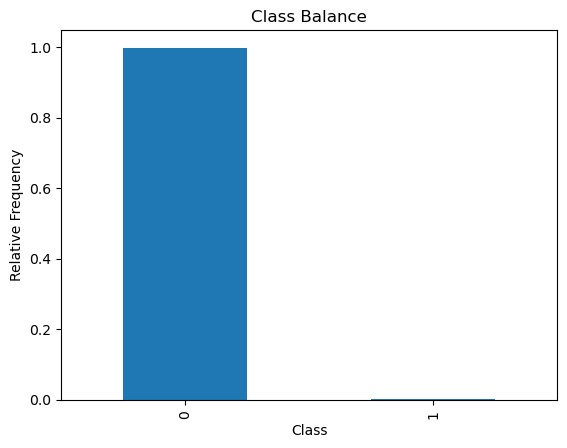

In [12]:
df["Class"].value_counts(normalize=True).plot(
    kind="bar", xlabel="Class", ylabel="Relative Frequency", title="Class Balance"
);

array([[<Axes: title={'center': 'V1'}>, <Axes: title={'center': 'V2'}>,
        <Axes: title={'center': 'V3'}>, <Axes: title={'center': 'V4'}>,
        <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>],
       [<Axes: title={'center': 'V11'}>, <Axes: title={'center': 'V12'}>,
        <Axes: title={'center': 'V13'}>, <Axes: title={'center': 'V14'}>,
        <Axes: title={'center': 'V15'}>],
       [<Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>,
        <Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>],
       [<Axes: title={'center': 'V21'}>, <Axes: title={'center': 'V22'}>,
        <Axes: title={'center': 'V23'}>, <Axes: title={'center': 'V24'}>,
        <Axes: title={'center': 'V25'}>],
       [<Axes: title={'center': 'V26'}>, <Axes: title={'cen

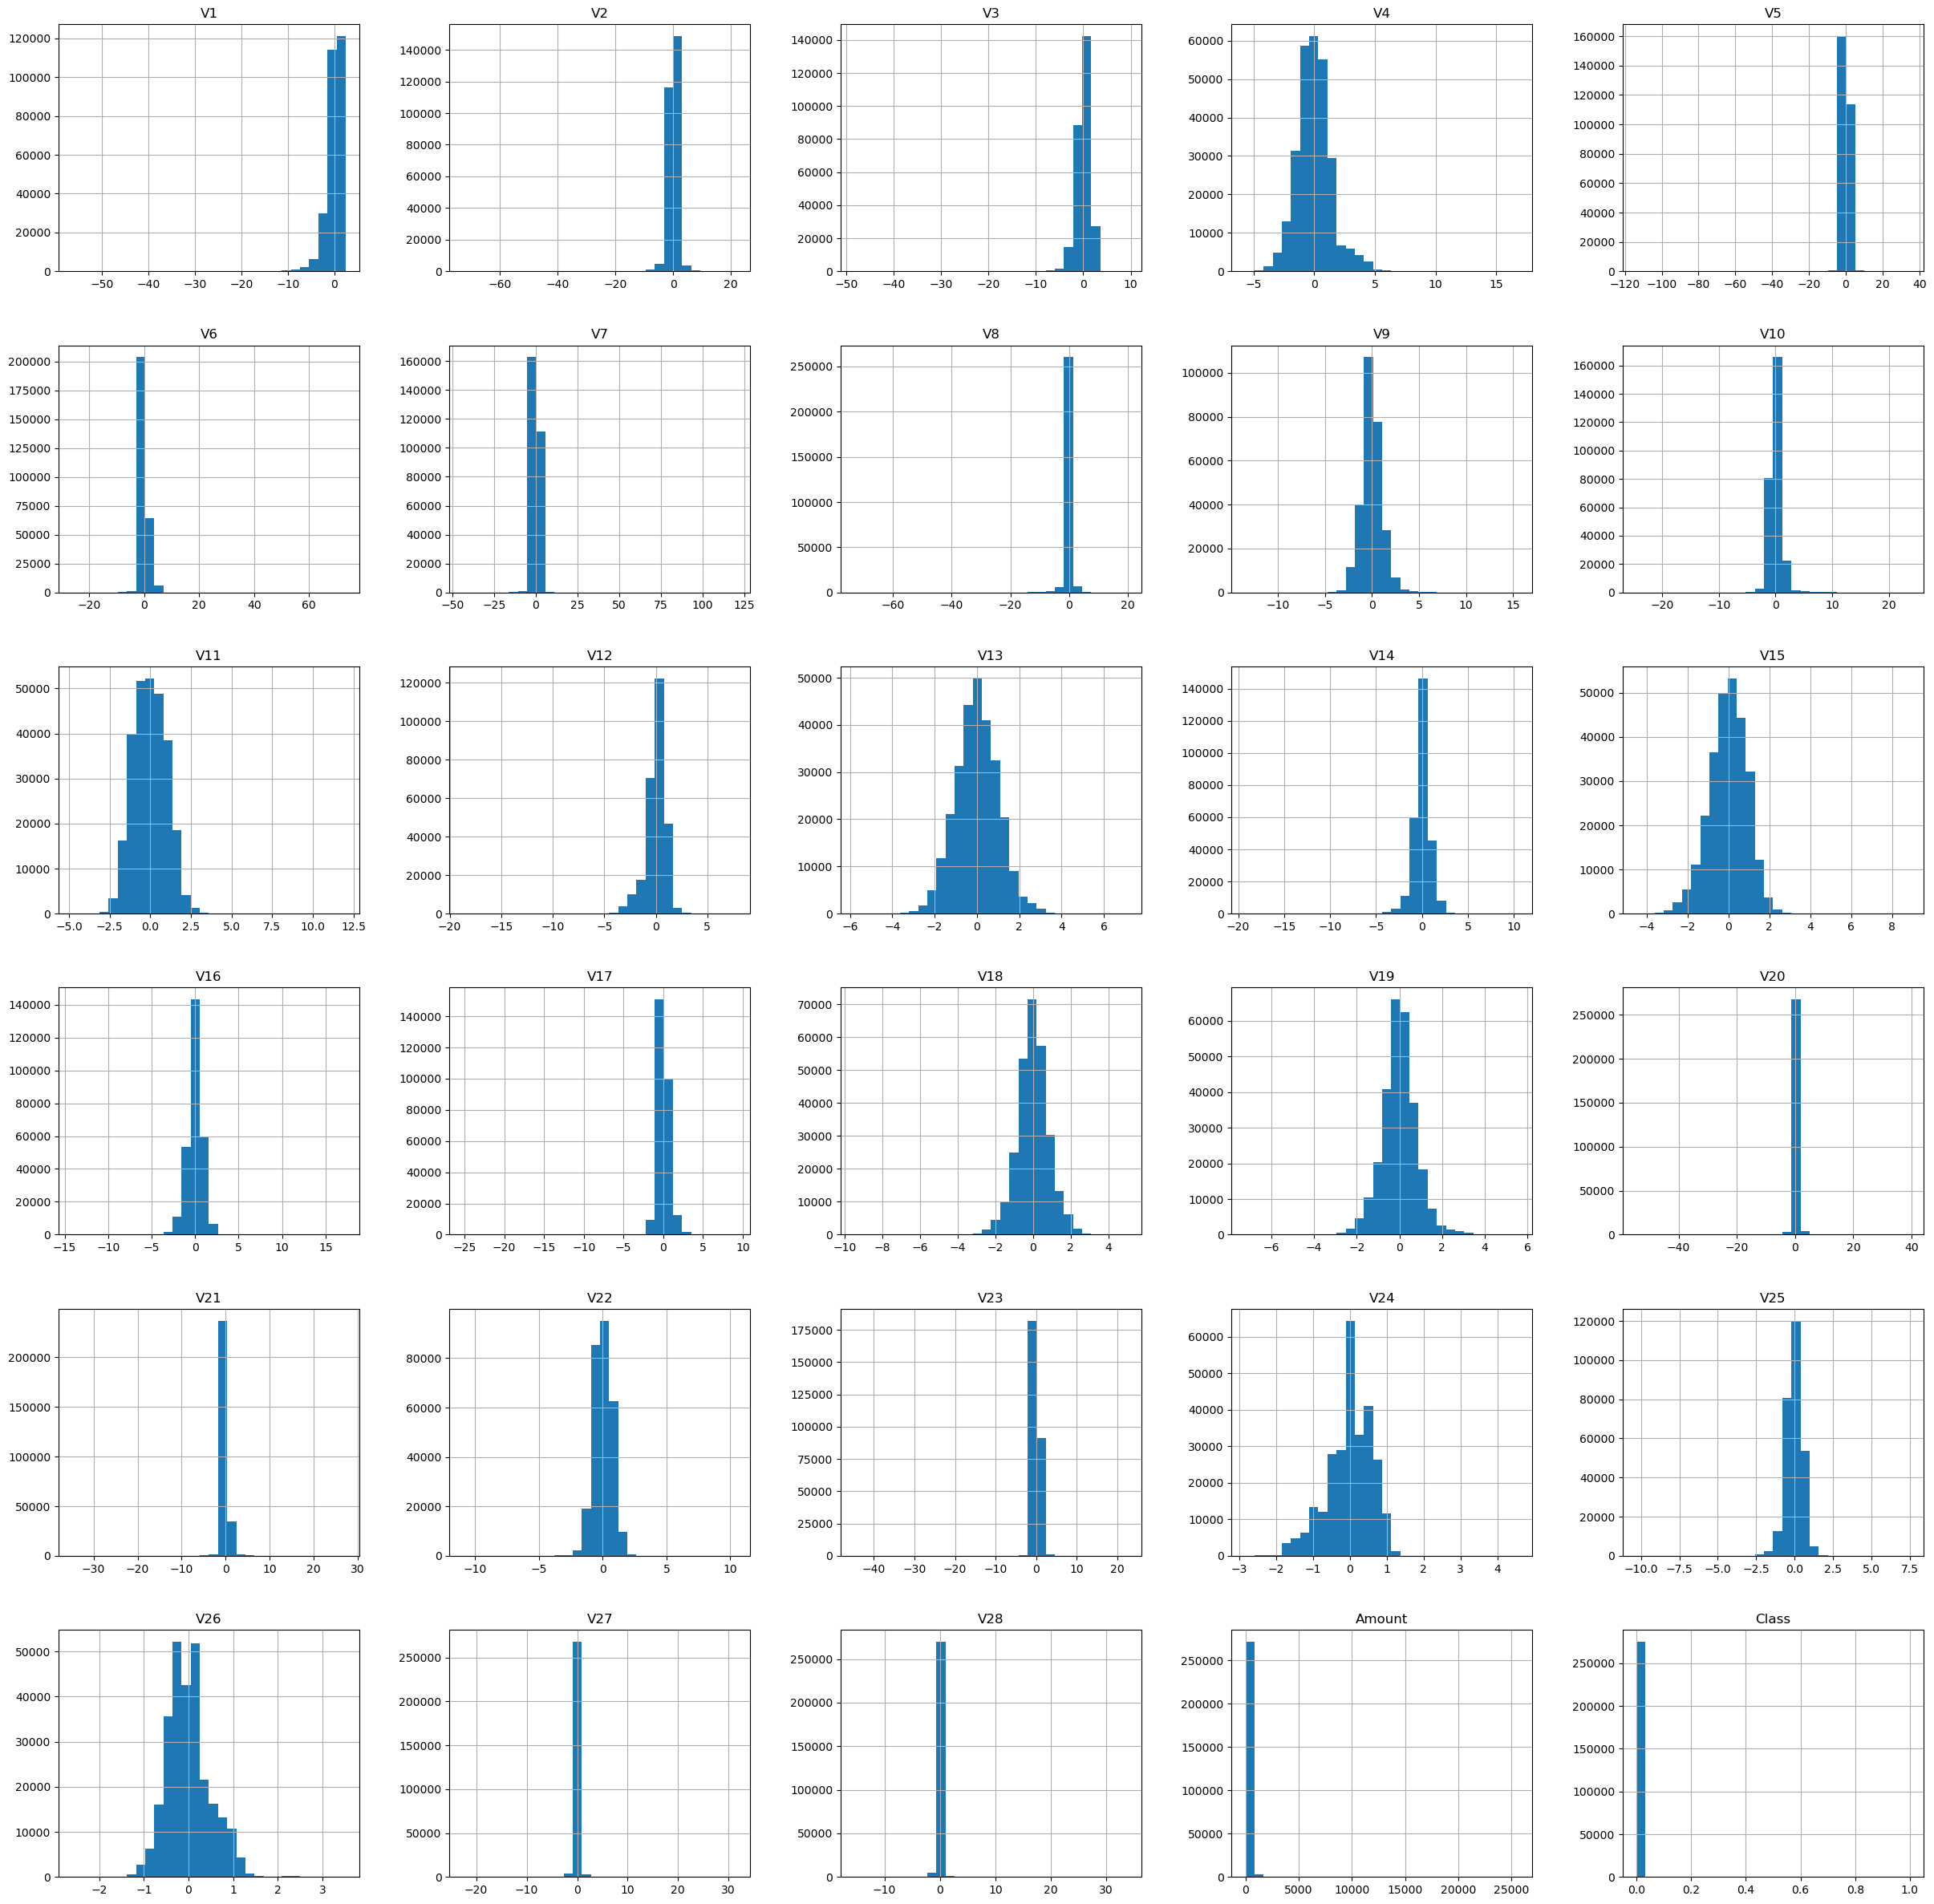

In [13]:
df.hist(bins=30, figsize=(30, 30))

In [14]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,...,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000,275663.000000
mean,-0.037460,-0.002430,0.025520,-0.004359,-0.010660,-0.014206,0.008586,-0.005698,-0.012363,0.003114,...,0.002579,0.005827,-0.001941,-0.006868,-0.004812,-0.000240,0.001921,0.000904,90.578380,0.001716
std,1.952522,1.667260,1.507538,1.424323,1.378117,1.313213,1.240348,1.191596,1.100108,1.087025,...,0.733089,0.726378,0.631451,0.605550,0.524175,0.484139,0.401271,0.332649,253.213954,0.041388
min,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,-0.941105,-0.614040,-0.843168,-0.862847,-0.700192,-0.765861,-0.552047,-0.209618,-0.659904,-0.538968,...,-0.225021,-0.532173,-0.165440,-0.361062,-0.323597,-0.328290,-0.071729,-0.052654,6.300000,0.000000
50%,-0.059659,0.070249,0.200736,-0.035098,-0.060556,-0.270931,0.044848,0.022980,-0.064724,-0.091752,...,-0.025637,0.013397,-0.013655,0.037569,0.009909,-0.056667,0.002615,0.011788,23.740000,0.000000
75%,1.294471,0.819067,1.048461,0.753943,0.604521,0.387704,0.583885,0.322319,0.593098,0.470702,...,0.189118,0.534272,0.145482,0.432931,0.347151,0.244196,0.094730,0.081355,79.910000,0.000000
max,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,23.745136,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


Scaling the dataset

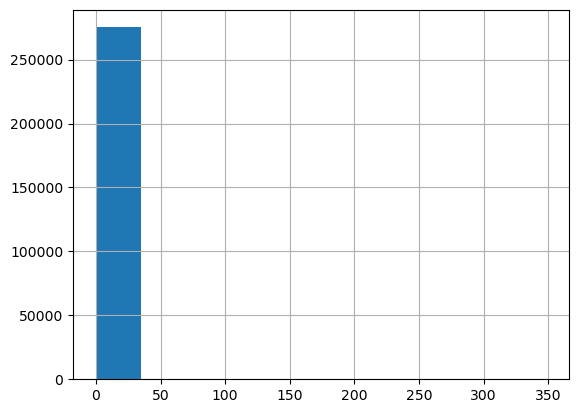

In [15]:
from sklearn.preprocessing import RobustScaler
new_df = df.copy()
new_df['Amount'] = RobustScaler().fit_transform(new_df['Amount'].to_numpy().reshape(-1, 1))
new_df['Amount'].hist();

In [16]:
new_df['Amount'].describe()

count    275663.000000
mean          0.908007
std           3.439940
min          -0.322511
25%          -0.236924
50%           0.000000
75%           0.763076
max         348.694743
Name: Amount, dtype: float64

Copying the contents of the data into new_df

In [17]:
new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.710094,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.285967,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.821627,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.355251,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.628311,0


Spliting the dataset into training and testing data

In [18]:
X = new_df.drop('Class',axis=1)
y = new_df['Class']

In [19]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (220530, 29)
y_train shape: (220530,)
X_test shape: (55133, 29)
y_test shape: (55133,)


 Building Models with the unbalanced dataset

Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
logistic_model.score(X_train, y_train)

0.999183784519113

In [21]:
# Predicting the result
y_pred = logistic_model.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

ac = accuracy_score(y_test,y_pred)*100
cm = confusion_matrix(y_test,y_pred)
cr= classification_report(y_test,y_pred, target_names=['Not Fraud', 'Fraud'])
print("accuracy score:",ac)
print("confusion matrix:",cm)
print("classification report:",cr)

accuracy score: 99.92200678359603
confusion matrix: [[55035     7]
 [   36    55]]
classification report:               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     55042
       Fraud       0.89      0.60      0.72        91

    accuracy                           1.00     55133
   macro avg       0.94      0.80      0.86     55133
weighted avg       1.00      1.00      1.00     55133



Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=2, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_jobs=-1)

In [24]:
y_pred=rf.predict(X_test)

In [25]:
ac = accuracy_score(y_test,y_pred)*100
cm = confusion_matrix(y_test,y_pred)
cr= classification_report(y_test,y_pred, target_names=['Not Fraud', 'Fraud'])
print("accuracy score:",ac)
print("confusion matrix:",cm)
print("classification report:",cr)

accuracy score: 99.89661364337148
confusion matrix: [[55030    12]
 [   45    46]]
classification report:               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     55042
       Fraud       0.79      0.51      0.62        91

    accuracy                           1.00     55133
   macro avg       0.90      0.75      0.81     55133
weighted avg       1.00      1.00      1.00     55133



Naive Bayes GaussianNB

In [26]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

ac = accuracy_score(y_test,y_pred)*100
cm = confusion_matrix(y_test,y_pred)
cr= classification_report(y_test,y_pred, target_names=['Not Fraud', 'Fraud'])
print("accuracy score:",ac)
print("confusion matrix:",cm)
print("classification report:",cr)

accuracy score: 97.81618994068889
confusion matrix: [[53857  1185]
 [   19    72]]
classification report:               precision    recall  f1-score   support

   Not Fraud       1.00      0.98      0.99     55042
       Fraud       0.06      0.79      0.11        91

    accuracy                           0.98     55133
   macro avg       0.53      0.88      0.55     55133
weighted avg       1.00      0.98      0.99     55133



Decision Tree 

In [27]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

ac = accuracy_score(y_test,y_pred)*100
cm = confusion_matrix(y_test,y_pred)
cr= classification_report(y_test,y_pred, target_names=['Not Fraud', 'Fraud'])
print("accuracy score:",ac)
print("confusion matrix:",cm)
print("classification report:",cr)

accuracy score: 99.89479984764115
confusion matrix: [[55007    35]
 [   23    68]]
classification report:               precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     55042
       Fraud       0.66      0.75      0.70        91

    accuracy                           1.00     55133
   macro avg       0.83      0.87      0.85     55133
weighted avg       1.00      1.00      1.00     55133



Balanced Dataset with OverSampling Technique

In [28]:
X = new_df.drop('Class',axis=1)
y = new_df['Class']

print("X.shape: ", X.shape)
print("y.shape: ", y.shape)

X.shape:  (275663, 29)
y.shape:  (275663,)


In [29]:
from imblearn.over_sampling import SMOTE

X_res,y_res = SMOTE().fit_resample(X,y)
y_res.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

Train Test Split on Balanced data

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.20,random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (440304, 29)
y_train shape: (440304,)
X_test shape: (110076, 29)
y_test shape: (110076,)


Logistic Regression on Balanced Data

In [31]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

ac = accuracy_score(y_test,y_pred)*100
cm = confusion_matrix(y_test,y_pred)
cr= classification_report(y_test,y_pred, target_names=['Not Fraud', 'Fraud'])
print("accuracy score:",ac)
print("confusion matrix:",cm)
print("classification report:",cr)

accuracy score: 94.55921363421635
confusion matrix: [[53718  1355]
 [ 4634 50369]]
classification report:               precision    recall  f1-score   support

   Not Fraud       0.92      0.98      0.95     55073
       Fraud       0.97      0.92      0.94     55003

    accuracy                           0.95    110076
   macro avg       0.95      0.95      0.95    110076
weighted avg       0.95      0.95      0.95    110076



Random Forest on Balanced Data

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=2, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

ac = accuracy_score(y_test,y_pred)*100
cm = confusion_matrix(y_test,y_pred)
cr= classification_report(y_test,y_pred, target_names=['Not Fraud', 'Fraud'])
print("accuracy score:",ac)
print("confusion matrix:",cm)
print("classification report:",cr)

accuracy score: 92.34801409934954
confusion matrix: [[54836   237]
 [ 8186 46817]]
classification report:               precision    recall  f1-score   support

   Not Fraud       0.87      1.00      0.93     55073
       Fraud       0.99      0.85      0.92     55003

    accuracy                           0.92    110076
   macro avg       0.93      0.92      0.92    110076
weighted avg       0.93      0.92      0.92    110076



GaussianNB on Balanced data

In [33]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

ac = accuracy_score(y_test,y_pred)*100
cm = confusion_matrix(y_test,y_pred)
cr= classification_report(y_test,y_pred, target_names=['Not Fraud', 'Fraud'])
print("accuracy score:",ac)
print("confusion matrix:",cm)
print("classification report:",cr)

accuracy score: 91.16701188269923
confusion matrix: [[53706  1367]
 [ 8356 46647]]
classification report:               precision    recall  f1-score   support

   Not Fraud       0.87      0.98      0.92     55073
       Fraud       0.97      0.85      0.91     55003

    accuracy                           0.91    110076
   macro avg       0.92      0.91      0.91    110076
weighted avg       0.92      0.91      0.91    110076



Decision Tree on Balanced data

In [34]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=6, random_state=42)
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

ac = accuracy_score(y_test,y_pred)*100
cm = confusion_matrix(y_test,y_pred)
cr= classification_report(y_test,y_pred, target_names=['Not Fraud', 'Fraud'])
print("accuracy score:",ac)
print("confusion matrix:",cm)
print("classification report:",cr)

accuracy score: 96.14629892074566
confusion matrix: [[52786  2287]
 [ 1955 53048]]
classification report:               precision    recall  f1-score   support

   Not Fraud       0.96      0.96      0.96     55073
       Fraud       0.96      0.96      0.96     55003

    accuracy                           0.96    110076
   macro avg       0.96      0.96      0.96    110076
weighted avg       0.96      0.96      0.96    110076

